In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [301]:
now = datetime.now()


start = datetime(now.year-10,now.month,now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600


In [302]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600


In [303]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500
2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700
2025-05-02,205.350006,206.990005,202.160004,206.089996,100912500


# 2. Data Exploration & Visualization

In [304]:
type(df)

pandas.core.frame.DataFrame

In [305]:
df.shape

(2516, 5)

In [306]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [307]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,100.645904,101.653198,99.522944,100.542423,1.116822e+08
std,68.430337,69.100349,67.658701,68.341219,6.471790e+07
min,20.674536,20.978909,20.475435,20.596726,2.323470e+07
25%,37.370714,37.630394,36.970678,37.306496,6.843475e+07
50%,77.180466,77.758602,76.462638,77.070580,9.603795e+07
75%,160.147243,161.867180,157.238314,159.657959,1.361035e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [308]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [309]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600


In [310]:
df = df.reset_index()

In [311]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600


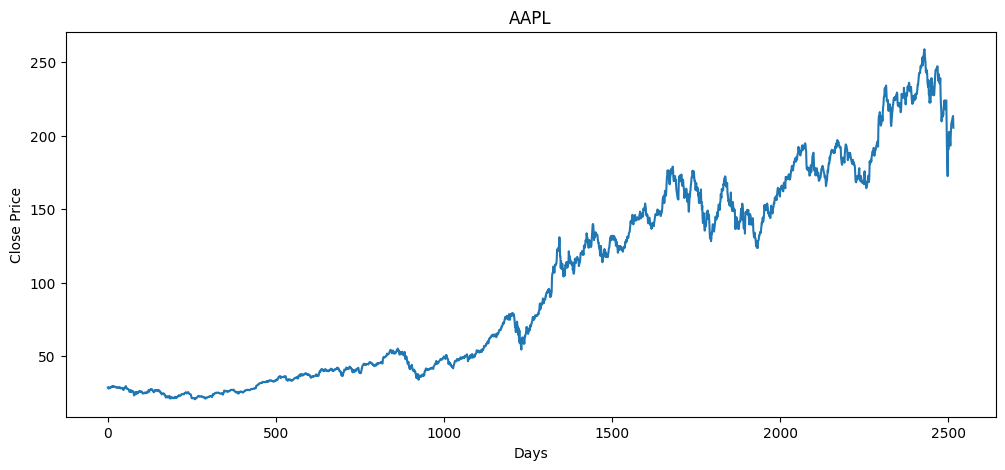

In [312]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price');

# 3. Feature Engineering

In [313]:
#10,20,30,40,50,60,70,80,90,100

#MA of 5 days ==> null null null null 30 40

In [314]:
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [315]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [316]:
df1['MA_5'] = df1.rolling(5).mean()
 #MA =moving average
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [317]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600
...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500


In [318]:
df.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [319]:
# To convert multi index col to single index
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

In [320]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [321]:
df = df.reset_index()



In [322]:
df

,index,Date,Close,High,Low,Open,Volume
0,0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200
1,1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600
2,2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000
3,3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600
4,4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600
...,...,...,...,...,...,...,...
2511,2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2512,2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2513,2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500
2514,2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700


In [323]:
df['MA_100'] = df.Close.rolling(100).mean()
df

,index,Date,Close,High,Low,Open,Volume,MA_100
0,0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200,NaN
1,1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600,NaN
2,2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN
3,3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600,NaN
4,4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600,NaN
...,...,...,...,...,...,...,...,...
2511,2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193
2512,2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025
2513,2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190
2514,2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959


Text(0, 0.5, 'Price')

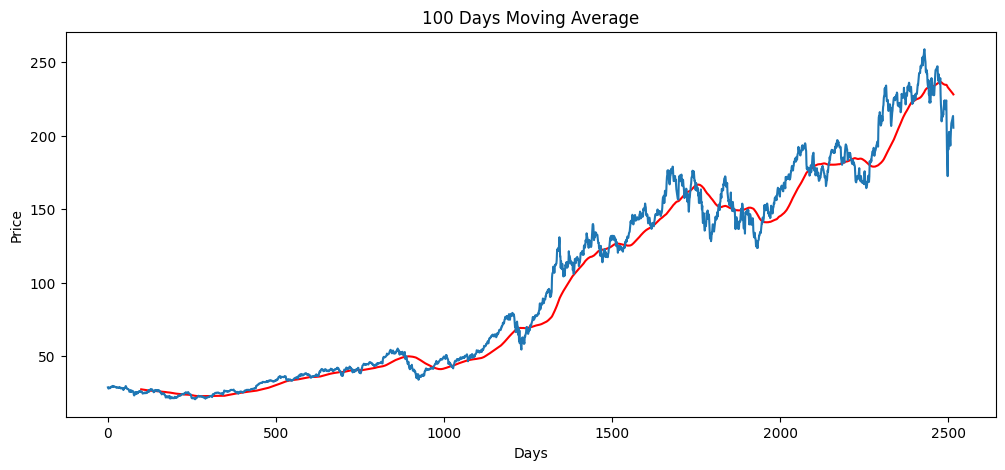

In [324]:
plt.figure(figsize=(12, 5))
plt.plot(df['MA_100'], 'r')
plt.plot(df.Close)
plt.title("100 Days Moving Average")
plt.xlabel('Days')
plt.ylabel('Price')

# 200 days Moving Average

In [325]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

,index,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200,NaN,NaN
1,1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600,NaN,NaN
2,2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN,NaN
3,3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600,NaN,NaN
4,4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
198,198,2016-02-16,21.982466,22.030234,21.520707,21.613968,196231600,24.652620,NaN
199,199,2016-02-17,22.319120,22.339592,21.871009,21.989291,179452800,24.618276,26.011168
200,200,2016-02-18,21.896030,22.494270,21.857360,22.482895,156084000,24.578169,25.976937
201,201,2016-02-19,21.845987,22.009764,21.791396,21.836888,141496800,24.538216,25.945694


Text(0, 0.5, 'Price')

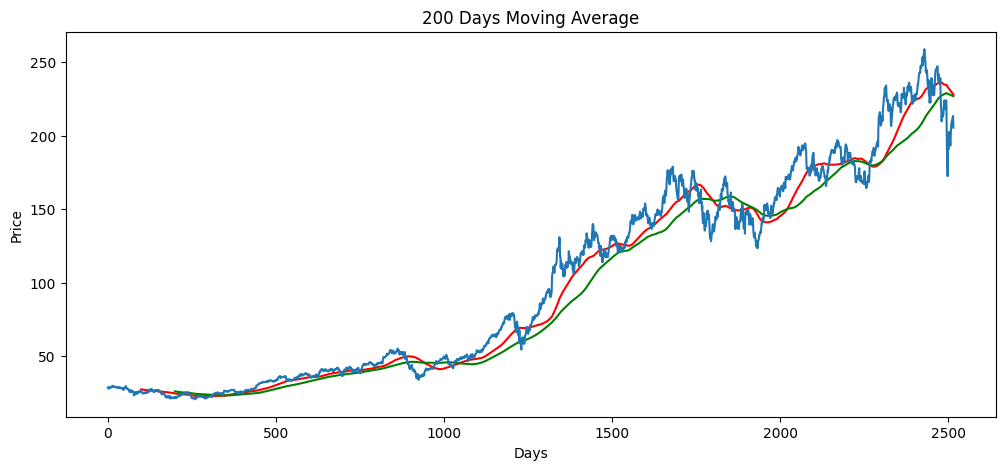

In [326]:
plt.figure(figsize=(12, 5))
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.plot(df.Close)
plt.title("200 Days Moving Average")
plt.xlabel('Days')
plt.ylabel('Price')

In [327]:
df.columns

Index(['index', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_100',
       'MA_200'],
      dtype='object')

In [328]:
df

,index,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,0,2015-05-04,28.742273,29.159898,28.644009,28.920936,203953200,NaN,NaN
1,1,2015-05-05,28.094618,28.686435,28.090150,28.619436,197085600,NaN,NaN
2,2,2015-05-06,27.918190,28.306780,27.549699,28.264347,288564000,NaN,NaN
3,3,2015-05-07,28.090866,28.274760,27.812782,27.980977,175763600,NaN,NaN
4,4,2015-05-08,28.620125,28.620125,28.281491,28.409319,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2511,2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193,227.195553
2512,2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025,227.117564
2513,2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190,227.031225
2514,2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959,226.929751


### Calculating % changed in each trading session

In [329]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

,Close,Percentage Changed
0,28.742273,NaN
1,28.094618,-0.022533
2,27.918190,-0.006280
3,28.090866,0.006185
4,28.620125,0.018841
...,...,...
2511,210.139999,0.004109
2512,211.210007,0.005092
2513,212.500000,0.006108
2514,213.320007,0.003859


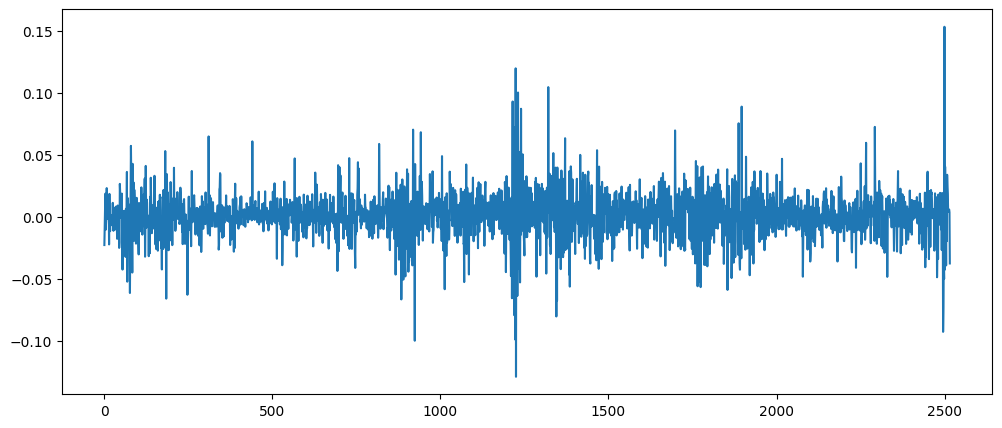

In [330]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [331]:
df.shape

(2516, 10)

In [332]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)]) # len(df) * 0.7 produces a floating-point number, and slicing (like df[0:some_number]) requires an integer index.
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training) # 70% = 1761 
print(data_testing) # 30% = 755

           Close
0      28.742273
1      28.094618
2      27.918190
3      28.090866
4      28.620125
...          ...
1756  159.210236
1757  160.282852
1758  154.299820
1759  154.073456
1760  161.030731

[1761 rows x 1 columns]
           Close
1761  155.136230
1762  155.441299
1763  156.937057
1764  163.372787
1765  154.270264
...          ...
2511  210.139999
2512  211.210007
2513  212.500000
2514  213.320007
2515  205.350006

[755 rows x 1 columns]


In [333]:
data_training

,Close
0,28.742273
1,28.094618
2,27.918190
3,28.090866
4,28.620125
...,...
1756,159.210236
1757,160.282852
1758,154.299820
1759,154.073456


In [334]:
data_testing

,Close
1761,155.136230
1762,155.441299
1763,156.937057
1764,163.372787
1765,154.270264
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [335]:
# Scalling down the data between 0 and 1

In [336]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [337]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05099535],
       [0.04690159],
       [0.04578641],
       ...,
       [0.84463191],
       [0.84320108],
       [0.88717732]])

In [338]:
data_training_array

array([[0.05099535],
       [0.04690159],
       [0.04578641],
       ...,
       [0.84463191],
       [0.84320108],
       [0.88717732]])

# 5. Sequence Creation

In [339]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [340]:
x_train

array([[[0.05099535],
        [0.04690159],
        [0.04578641],
        ...,
        [0.03337101],
        [0.03079366],
        [0.0321037 ]],

       [[0.04690159],
        [0.04578641],
        [0.04687787],
        ...,
        [0.03079366],
        [0.0321037 ],
        [0.03307196]],

       [[0.04578641],
        [0.04687787],
        [0.05022326],
        ...,
        [0.0321037 ],
        [0.03307196],
        [0.03265901]],

       ...,

       [[0.89290206],
        [0.88662775],
        [0.87470026],
        ...,
        [0.90446922],
        [0.87567015],
        [0.88245005]],

       [[0.88662775],
        [0.87470026],
        [0.89631878],
        ...,
        [0.87567015],
        [0.88245005],
        [0.84463191]],

       [[0.87470026],
        [0.89631878],
        [0.93272182],
        ...,
        [0.88245005],
        [0.84463191],
        [0.84320108]]])

In [341]:
x_train.ndim

3

In [342]:
y_train.ndim

1

In [343]:
x_train.shape

(1661, 100, 1)

In [344]:
y_train

array([0.03307196, 0.03265901, 0.02942668, ..., 0.84463191, 0.84320108,
       0.88717732])

# 6. Model Building

In [345]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [346]:

# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [347]:

model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))


## 7.Model Training

In [348]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0219
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.5456e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.8088e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.6381e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.9202e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.0953e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.8862e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5.3697e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.9563e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.2465e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.4186e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 3.2823e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.6179e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 3.1919e-04
Epoch 15/50
52/52 ━

In [349]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [350]:
# Save the trained mode
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [351]:
data_training.tail(100)

,Close
1661,162.476959
1662,168.236115
1663,172.069107
1664,171.558044
1665,176.363922
...,...
1756,159.210236
1757,160.282852
1758,154.299820
1759,154.073456


In [352]:
data_testing

,Close
1761,155.136230
1762,155.441299
1763,156.937057
1764,163.372787
1765,154.270264
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [353]:
past_100_days = data_training.tail(100)

In [354]:
past_100_days

,Close
1661,162.476959
1662,168.236115
1663,172.069107
1664,171.558044
1665,176.363922
...,...
1756,159.210236
1757,160.282852
1758,154.299820
1759,154.073456


In [355]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,162.476959
1,168.236115
2,172.069107
3,171.558044
4,176.363922
...,...
850,210.139999
851,211.210007
852,212.500000
853,213.320007


In [356]:
input_data =scaler.fit_transform(final_df)
input_data

array([[2.87777786e-01],
       [3.30390090e-01],
       [3.58750610e-01],
       [3.54969230e-01],
       [3.90528181e-01],
       [3.63549902e-01],
       [3.53296720e-01],
       [3.89437561e-01],
       [3.38244021e-01],
       [3.30099596e-01],
       [3.19991718e-01],
       [3.43552607e-01],
       [3.62822935e-01],
       [3.67476586e-01],
       [3.96927500e-01],
       [3.89364740e-01],
       [3.90019225e-01],
       [3.81438440e-01],
       [3.76857384e-01],
       [4.09143911e-01],
       [3.92346219e-01],
       [3.57586944e-01],
       [3.36353274e-01],
       [3.37589649e-01],
       [3.37734952e-01],
       [3.58750610e-01],
       [3.62022922e-01],
       [3.37734952e-01],
       [3.44134384e-01],
       [3.20355370e-01],
       [2.94394778e-01],
       [2.81887423e-01],
       [2.66616825e-01],
       [2.60871990e-01],
       [2.47491913e-01],
       [2.46837089e-01],
       [2.43419701e-01],
       [3.24209346e-01],
       [3.56569145e-01],
       [3.55332883e-01],


In [357]:
input_data.shape

(855, 1)

In [358]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i ])
    y_test.append(input_data[i, 0])

In [359]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [360]:
x_test[0].shape # x_test is sequence of 100 data

(100, 1)

In [361]:
x_test

array([[[0.28777779],
        [0.33039009],
        [0.35875061],
        ...,
        [0.22727469],
        [0.22559981],
        [0.27707707]],

       [[0.33039009],
        [0.35875061],
        [0.35496923],
        ...,
        [0.22559981],
        [0.27707707],
        [0.23346333]],

       [[0.35875061],
        [0.35496923],
        [0.39052818],
        ...,
        [0.27707707],
        [0.23346333],
        [0.23572056]],

       ...,

       [[0.87901062],
        [0.88167135],
        [0.88189309],
        ...,
        [0.63407602],
        [0.64043921],
        [0.64835626]],

       [[0.88167135],
        [0.88189309],
        [0.88041488],
        ...,
        [0.64043921],
        [0.64835626],
        [0.65790099]],

       [[0.88189309],
        [0.88041488],
        [0.90931349],
        ...,
        [0.64835626],
        [0.65790099],
        [0.66396827]]])

# 9. Making Predictions

In [362]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [363]:
y_predicted

array([[0.2472646 ],
       [0.24480015],
       [0.24120232],
       [0.24214162],
       [0.26061368],
       [0.2547238 ],
       [0.24538743],
       [0.2250824 ],
       [0.21422414],
       [0.19078264],
       [0.16234006],
       [0.15179625],
       [0.14689167],
       [0.15404937],
       [0.14383188],
       [0.12352644],
       [0.10658132],
       [0.10781358],
       [0.10891905],
       [0.11001675],
       [0.11789127],
       [0.13885263],
       [0.15598816],
       [0.16598421],
       [0.1760163 ],
       [0.16903034],
       [0.160394  ],
       [0.1597092 ],
       [0.16013856],
       [0.1487151 ],
       [0.12486612],
       [0.09317057],
       [0.07035836],
       [0.06290724],
       [0.05201778],
       [0.046216  ],
       [0.05282593],
       [0.06099017],
       [0.07347617],
       [0.09110953],
       [0.1052603 ],
       [0.1045392 ],
       [0.1026247 ],
       [0.09531784],
       [0.09304025],
       [0.09887377],
       [0.10882318],
       [0.124

In [364]:
y_test

array([2.33463335e-01, 2.35720557e-01, 2.46787752e-01, 2.94406068e-01,
       2.27055999e-01, 2.32451971e-01, 1.94388772e-01, 2.12253713e-01,
       1.53846614e-01, 1.25117134e-01, 1.58294672e-01, 1.46846550e-01,
       1.73826071e-01, 1.12429364e-01, 8.71268691e-02, 8.88769415e-02,
       1.29127477e-01, 1.09075312e-01, 1.10241914e-01, 1.34013138e-01,
       1.76742858e-01, 1.70909283e-01, 1.69961709e-01, 1.88191093e-01,
       1.45680061e-01, 1.51221449e-01, 1.69961709e-01, 1.64492577e-01,
       1.25700379e-01, 8.55227772e-02, 4.72411155e-02, 5.36577088e-02,
       7.31265160e-02, 3.39698745e-02, 4.49075728e-02, 7.63350384e-02,
       7.25436101e-02, 9.38354234e-02, 1.18554561e-01, 1.18554561e-01,
       8.77830475e-02, 1.00835374e-01, 8.25331691e-02, 9.86479249e-02,
       1.17825223e-01, 1.27741961e-01, 1.52753059e-01, 1.57784249e-01,
       1.41961002e-01, 1.49180093e-01, 1.46481881e-01, 1.68211636e-01,
       1.80607446e-01, 1.58002937e-01, 1.86659709e-01, 2.01534816e-01,
      

In [365]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [366]:
y_predicted 

array([157.00151 , 156.66844 , 156.18217 , 156.30911 , 158.80566 ,
       158.00963 , 156.7478  , 154.00352 , 152.536   , 149.36783 ,
       145.52374 , 144.09872 , 143.43587 , 144.40324 , 143.02232 ,
       140.278   , 137.98782 , 138.15436 , 138.30377 , 138.45212 ,
       139.51639 , 142.34937 , 144.66528 , 146.01627 , 147.37213 ,
       146.42795 , 145.26073 , 145.16818 , 145.22621 , 143.68231 ,
       140.45906 , 136.17532 , 133.0922  , 132.08516 , 130.61343 ,
       129.8293  , 130.72266 , 131.82607 , 133.51358 , 135.89677 ,
       137.80928 , 137.71182 , 137.45306 , 136.46553 , 136.15771 ,
       136.94612 , 138.29082 , 140.4604  , 142.46407 , 143.11247 ,
       143.39186 , 143.33203 , 144.09227 , 145.42021 , 145.54994 ,
       146.47731 , 148.01701 , 150.01451 , 151.09921 , 151.15483 ,
       150.41545 , 151.34486 , 152.69258 , 155.47357 , 157.43958 ,
       157.96191 , 159.9442  , 161.55978 , 162.41768 , 162.56116 ,
       162.4473  , 163.82645 , 164.90118 , 166.82536 , 168.702

In [367]:
y_test

array([155.13623047, 155.44129944, 156.9370575 , 163.37278748,
       154.27026367, 154.99954224, 149.85520935, 152.2696991 ,
       144.37583923, 140.49298096, 144.977005  , 143.42976379,
       147.07611084, 138.77819824, 135.35850525, 135.59503174,
       141.0349884 , 138.32489014, 138.4825592 , 141.69529724,
       147.47032166, 146.68190002, 146.55383301, 149.01757812,
       143.27210999, 144.02104187, 146.55383301, 145.81466675,
       140.57180786, 135.14170837, 129.96784973, 130.83506775,
       133.46632385, 128.17420959, 129.65246582, 133.89996338,
       133.38754272, 136.2651825 , 139.60603333, 139.60603333,
       135.44718933, 137.21124268, 134.73765564, 136.91560364,
       139.50746155, 140.84773254, 144.2280426 , 144.90802002,
       142.76947021, 143.74514771, 143.38047791, 146.31730652,
       147.99263   , 144.93757629, 148.81060791, 150.8210144 ,
       153.09754944, 151.85578918, 150.73234558, 149.40193176,
       154.51664734, 155.06852722, 160.1537323 , 159.16

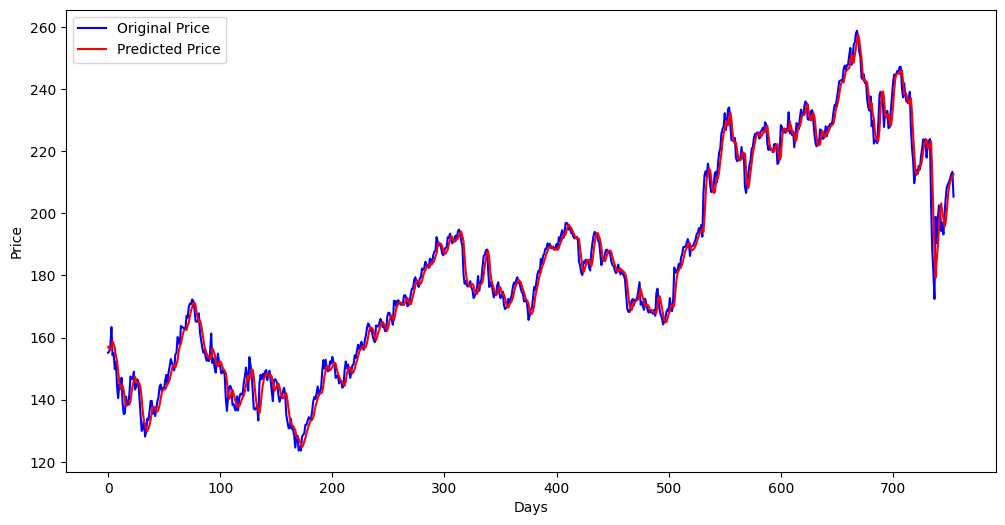

In [371]:
plt.figure(figsize=(12, 6))  # Set the size of the plot (width=12, height=6)
plt.plot(y_test, 'b', label='Original Price')  # Plot the true values in blue
plt.plot(y_predicted, 'r', label='Predicted Price')  # Plot the predicted values in red
plt.xlabel('Days')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.legend()  # Show legend to distinguish between original and predicted

(140.0, 220.0)

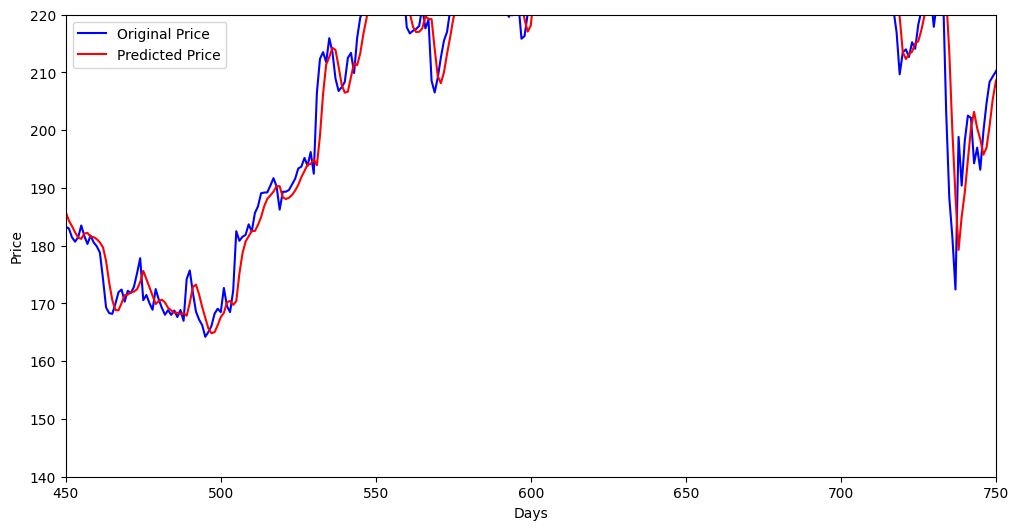

In [370]:
plt.figure(figsize=(12, 6))  # Set the size of the plot (width=12, height=6)
plt.plot(y_test, 'b', label='Original Price')  # Plot the true values in blue
plt.plot(y_predicted, 'r', label='Predicted Price')  # Plot the predicted values in red
plt.xlabel('Days')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.legend()  # Show legend to distinguish between original and predicted
plt.xlim(450, 750)# zoom in
plt.ylim(140, 220)

# 10. Model Evaluation

In [378]:
# Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score


In [374]:
mse = mean_squared_error(y_test, y_predicted)
print (f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.45232721618407


In [377]:
# Root Mean Squared Error(MSE)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (RMSE): 3.9309448248715055


In [379]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9857469106521695
